In [1]:
import pandas as pd
import os
import numpy as np
from datetime import date
#from tqdm import tqdm
import warnings
pd.set_option('display.max_rows', 2983 )
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
%pylab inline 
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_last(df):
    return df.iloc[-1]
def get_first(df):
    return df.iloc[:1]

**CRUCE PROMOS ACTIVAS CON ATRIBUTOS DE LOS CLIENTES**

In [112]:
clients_attributes=pd.read_csv('Input/clients_attributes.csv')
clients_attributes.head() # Table maestro de clientes

,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2009-03-03,4,21,12,1,1,1
1,9,2009-03-03,4,21,9,2,3,1
2,15,2009-03-03,4,21,9,2,3,0
3,37,2009-03-03,4,21,16,2,3,1
4,43,2009-03-03,4,21,9,2,3,0


In [347]:
clients_attributes.Cliente.max()

15069

In [108]:
clients_attributes.shape

(15069, 8)

In [113]:
active_promos=pd.read_csv('Input/active_promos.csv')
active_promos.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
1,297601,29,9,2018-08-06,2018-08-30,3795
2,297601,29,9,2018-08-06,2018-08-30,11816
3,298856,40,16,2018-08-12,2018-08-19,8444
4,309916,40,16,2018-08-12,2018-08-19,8488


In [122]:
active_promos.Fecha_Hasta.max()

'2019-10-13'

In [114]:
active_promos.shape

(422437, 6)

In [159]:
promos_activas=pd.merge(active_promos, clients_attributes, how='left', on=['Cliente'])
promos_activas['Fecha_Desde']=pd.to_datetime(promos_activas['Fecha_Desde'])
promos_activas['Fecha_Hasta']=pd.to_datetime(promos_activas['Fecha_Hasta'])
promos_activas['FechaAltaCliente']=pd.to_datetime(promos_activas['FechaAltaCliente'])
promos_activas['key']=promos_activas['CodigoDC'].astype('str')+promos_activas['Cliente'].astype('str')+promos_activas['Marca'].astype('str')+promos_activas['Cupo'].astype('str')
promos_activas.head() # Base de todas las promociones dispuestas para los clientes

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,key
0,297601,29,9,2018-08-06,2018-08-30,3213,2010-03-29,3,8,15,2,3,1,2976013213299
1,297601,29,9,2018-08-06,2018-08-30,3795,2010-04-26,3,10,6,2,3,1,2976013795299
2,297601,29,9,2018-08-06,2018-08-30,11816,2017-10-01,3,7,12,2,3,1,29760111816299
3,298856,40,16,2018-08-12,2018-08-19,8444,2015-09-02,5,27,18,2,2,1,29885684444016
4,309916,40,16,2018-08-12,2018-08-19,8488,2015-09-16,3,10,16,2,2,0,30991684884016


In [195]:
promos_activas.dtypes

CodigoDC                     int64
Marca                        int64
Cupo                         int64
Fecha_Desde         datetime64[ns]
Fecha_Hasta         datetime64[ns]
Cliente                      int64
FechaAltaCliente    datetime64[ns]
Region                       int64
Gerencia                     int64
SubCanal                     int64
TipoPoblacion                int64
Estrato                      int64
EF                           int64
key                         object
dtype: object

In [340]:
promos_activas.shape

(422437, 14)

In [342]:
promos_activas.Fecha_Hasta.max()

Timestamp('2019-10-13 00:00:00')

**CRUCE DE TODAS LAS PROMOCIONES DADAS CON LAS PROMOCIONES EJECUTADAS**

In [160]:
promos_ejecutadas=pd.read_csv('Input/executed_promos.csv')
promos_ejecutadas['key']=promos_ejecutadas['CodigoDC'].astype('str')+promos_ejecutadas['Cliente'].astype('str')+promos_ejecutadas['Marca'].astype('str')+promos_ejecutadas['Cupo'].astype('str')
promos_ejecutadas['Target']=1
promos_ejecutadas

,CodigoDC,Cliente,Marca,Cupo,key,Target
0,297601,8410,29,9,2976018410299,1
1,297601,9337,29,9,2976019337299,1
2,309843,7404,40,16,30984374044016,1
3,309874,4017,40,16,30987440174016,1
4,309910,6316,40,16,30991063164016,1
...,...,...,...,...,...,...
27789,651436,9798,39,20,65143697983920,1
27790,651588,2397,39,20,65158823973920,1
27791,651597,4430,40,16,65159744304016,1
27792,651617,7347,39,20,65161773473920,1


In [339]:
promos_ejecutadas.shape

(27794, 6)

In [344]:
df1=pd.merge(promos_activas, promos_ejecutadas[['key', 'Target']], how='left', on=['key'])
df1['Target']=df1['Target'].fillna(0).astype('int')
df1['month_desde']=pd.DatetimeIndex(df1['Fecha_Desde']).month
df1['month_hasta']=pd.DatetimeIndex(df1['Fecha_Hasta']).month
df1['year_desde']=pd.DatetimeIndex(df1['Fecha_Desde']).year
df1['year_hasta']=pd.DatetimeIndex(df1['Fecha_Hasta']).year
df1['resta_month']=df1['month_desde']-df1['month_hasta']
df1['resta_year']=df1['year_desde']-df1['year_hasta']
df1['key2']=df1['Cliente'].astype('str')+df1['Marca'].astype('str')+df1['Cupo'].astype('str')+df1['year_desde'].astype('str')+df1['month_desde'].astype('str')
df1['key3']=df1['Cliente'].astype('str')+df1['Marca'].astype('str')+df1['Cupo'].astype('str')
df1=df1.sort_values(by=['Cliente', 'Marca', 'Cupo', 'Fecha_Desde'])
df1.tail(1500)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,key,Target,month_desde,month_hasta,year_desde,year_hasta,resta_month,resta_year,key2,key3
417232,660833,29,9,2019-09-05,2019-09-14,14831,2019-01-15,3,8,9,2,3,0,66083314831299,0,9,9,2019,2019,0,0,1483129920199,14831299
257076,641878,39,20,2019-08-07,2019-08-20,14831,2019-01-15,3,8,9,2,3,0,641878148313920,0,8,8,2019,2019,0,0,14831392020198,148313920
301989,672838,39,20,2019-09-11,2019-09-17,14831,2019-01-15,3,8,9,2,3,0,672838148313920,0,9,9,2019,2019,0,0,14831392020199,148313920
419713,673992,39,20,2019-09-18,2019-09-29,14831,2019-01-15,3,8,9,2,3,0,673992148313920,0,9,9,2019,2019,0,0,14831392020199,148313920
368459,684004,39,20,2019-09-22,2019-09-26,14831,2019-01-15,3,8,9,2,3,0,684004148313920,0,9,9,2019,2019,0,0,14831392020199,148313920
282329,641878,40,16,2019-08-07,2019-08-20,14831,2019-01-15,3,8,9,2,3,0,641878148314016,0,8,8,2019,2019,0,0,14831401620198,148314016
372480,672838,40,16,2019-09-11,2019-09-17,14831,2019-01-15,3,8,9,2,3,0,672838148314016,0,9,9,2019,2019,0,0,14831401620199,148314016
308052,673992,40,16,2019-09-18,2019-09-29,14831,2019-01-15,3,8,9,2,3,0,673992148314016,0,9,9,2019,2019,0,0,14831401620199,148314016
375061,684004,40,16,2019-09-22,2019-09-26,14831,2019-01-15,3,8,9,2,3,0,684004148314016,0,9,9,2019,2019,0,0,14831401620199,148314016
334072,607934,39,20,2019-03-09,2019-03-17,14832,2019-01-15,5,17,18,2,1,0,607934148323920,0,3,3,2019,2019,0,0,14832392020193,148323920


In [329]:
df1.Target.value_counts()

0    394643
1     27794
Name: Target, dtype: int64

In [365]:
temp_df1=pd.DataFrame(df1.pivot_table(index=['Cliente', 'Marca', 'Cupo'], aggfunc={'Target':['sum', 'count']}))
temp_df1.columns=['num_descuentos', 'num_ejecuta']
temp_df1=temp_df1.reset_index(inplace=False)
temp_df1['tasa_aceptacion']=(temp_df1['num_ejecuta']/temp_df1['num_descuentos']*100).round(2)
temp_df1=temp_df1.sort_values(by=['Cliente'])
temp_df1

,Cliente,Marca,Cupo,num_descuentos,num_ejecuta,tasa_aceptacion
0,1,29,9,3,0,0.00
1,1,39,20,18,0,0.00
2,1,40,16,18,1,5.56
3,2,29,9,6,0,0.00
4,2,39,20,16,0,0.00
...,...,...,...,...,...,...
34544,15067,29,9,1,0,0.00
34548,15068,39,20,4,0,0.00
34549,15068,40,16,4,0,0.00
34547,15068,29,9,1,0,0.00


In [370]:
temp_df1[temp_df1.tasa_aceptacion==0].shape

(26125, 6)

In [336]:
temp.shape

(34551, 6)

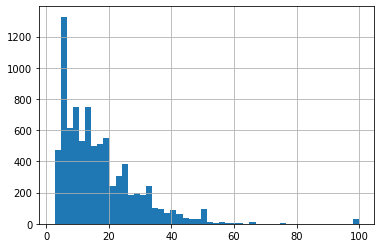

In [334]:
temp[temp!=0].tasa_aceptacion.hist(bins=50)

In [361]:
sales=pd.read_csv('Input/sales.csv')
sales.Cliente.max()

10618

In [363]:
sales=pd.read_csv('Input/sales.csv')
sales.loc[(sales.Anio==2018) & (sales.Mes==1),'Flag']=0
sales.loc[(sales.Anio==2018) & (sales.Mes==2),'Flag']=0
sales.loc[(sales.Anio==2018) & (sales.Mes==3),'Flag']=0
sales.loc[(sales.Anio==2018) & (sales.Mes==4),'Flag']=0
sales.loc[(sales.Anio==2018) & (sales.Mes==5),'Flag']=0
sales.loc[(sales.Anio==2018) & (sales.Mes==6),'Flag']=0
sales.loc[(sales.Anio==2018) & (sales.Mes==7),'Flag']=0
sales['Flag']=sales['Flag'].fillna(1)
sales=sales[sales.Flag==1]#PROCESO DE ELIMACION DE MESES 1,2,3,4,6,7,8 DEL 2018
sales['key2']=sales['Cliente'].astype('str')+sales['Marca'].astype('str')+sales['Cupo'].astype('str')+sales['Anio'].astype('str')+sales['Mes'].astype('str')
sales=sales.sort_values(by=['Cliente'])
sales

,Cliente,Anio,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,Flag,key2
4,1,2018,8,2,1,2,16,16250.18,0.06,0.00,1.0,121620188
11733,1,2019,5,2,1,6,16,18656.89,0.06,-4208.81,1.0,161620195
11732,1,2019,5,1,2,44,32,19517.54,0.09,-3670.08,1.0,1443220195
11731,1,2019,5,1,2,44,30,25894.15,0.16,-897.48,1.0,1443020195
11730,1,2019,3,2,1,6,16,27985.33,0.09,-6313.22,1.0,161620193
...,...,...,...,...,...,...,...,...,...,...,...,...
1047065,10617,2018,9,1,2,37,34,14385.69,0.06,-1176.05,1.0,10617373420189
1047066,10617,2018,10,1,2,45,32,-250.83,0.00,0.00,1.0,106174532201810
1047067,10617,2018,10,2,1,40,19,26987.43,0.11,0.00,1.0,106174019201810
1047069,10617,2018,12,1,2,37,34,9395.02,0.06,-6207.98,1.0,106173734201812


In [354]:
temp_sales=sales.pivot_table(index=['Cliente', 'Marca', 'Cupo'], aggfunc={'ClaseEnvase':'max',
                                                                           'SegmentoPrecio':'max', 
                                                                           'Nr':'mean',
                                                                           'Hl':'mean','Dcto':'sum'})
temp_sales=temp_sales.reset_index(inplace=False)
temp_sales

,Cliente,Marca,Cupo,ClaseEnvase,Dcto,Hl,Nr,SegmentoPrecio
0,1,1,35,1,-3150.00,0.030000,5175.000000,2
1,1,2,16,2,-4160.85,0.139091,37570.186364,1
2,1,2,19,2,0.00,0.070000,18372.100000,1
3,1,2,26,1,0.00,0.061250,22665.478750,1
4,1,6,7,2,0.00,0.186667,70392.033333,1
...,...,...,...,...,...,...,...,...
180236,10617,44,29,1,0.00,0.085000,16064.705000,2
180237,10617,44,30,1,-179.50,0.050000,8750.440000,2
180238,10617,44,33,1,0.00,0.030000,11719.860000,2
180239,10617,45,32,1,0.00,0.005000,1891.140000,2


# INPUT:

In [350]:
test=pd.read_csv('Input/test.csv')
test['key']=test['Cliente'].astype('str')+test['Marca'].astype('str')+test['Cupo'].astype('str')
test=test.sort_values(by=['Cliente'])
test

,Cliente,Marca,Cupo,Ejecuto_Promo,key
5578,1,40,16,NaN,14016
14044,1,39,20,NaN,13920
11230,1,29,9,NaN,1299
11231,2,29,9,NaN,2299
8453,6,39,20,NaN,63920
...,...,...,...,...,...
11228,15064,39,20,NaN,150643920
16869,15064,29,9,NaN,15064299
14043,15065,29,9,NaN,15065299
5577,15068,40,16,NaN,150684016


In [348]:
test.Cliente.max()

15068

In [219]:
test.shape

(16870, 4)

In [221]:
test.key.unique().shape

(16870,)

**CRUCE DEL TEMP_DF1 CON TEMP_SALES:**

In [366]:
df=pd.merge(temp_df1, temp_sales, how='left', on=['Cliente', 'Marca', 'Cupo'])
df

,Cliente,Marca,Cupo,num_descuentos,num_ejecuta,tasa_aceptacion,ClaseEnvase,Dcto,Hl,Nr,SegmentoPrecio
0,1,29,9,3,0,0.00,1.0,0.00,0.025,16815.710000,4.0
1,1,39,20,18,0,0.00,NaN,NaN,NaN,NaN,NaN
2,1,40,16,18,1,5.56,2.0,-12673.04,0.175,54445.096667,1.0
3,2,29,9,6,0,0.00,1.0,-7685.78,0.060,40543.285000,4.0
4,2,39,20,16,0,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34546,15067,29,9,1,0,0.00,NaN,NaN,NaN,NaN,NaN
34547,15068,39,20,4,0,0.00,NaN,NaN,NaN,NaN,NaN
34548,15068,40,16,4,0,0.00,NaN,NaN,NaN,NaN,NaN
34549,15068,29,9,1,0,0.00,NaN,NaN,NaN,NaN,NaN
